# TP 4
Author : MARZAT Noé

In [12]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [13]:
def load_binary_image(filename):
    img = cv.imread(filename, cv.IMREAD_GRAYSCALE)             # load as grayscale
    img = cv.normalize(img, None, 0.0, 1.0, cv.NORM_MINMAX)    # binarize
    return img

def plot3(im1, im2, im3):
    plt.subplot(1, 3, 1)
    plt.imshow(im1, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.imshow(im2, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.imshow(im3, cmap='gray')
    plt.show()

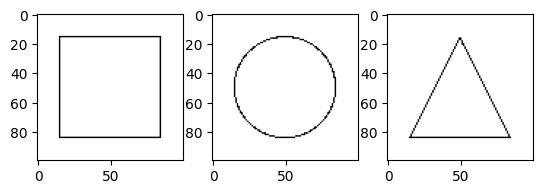

In [14]:
carre = load_binary_image("img-tp4/carre.png")
cercle = load_binary_image("img-tp4/cercle.png")
triangle = load_binary_image("img-tp4/triangle.png")

plot3(carre, cercle, triangle)

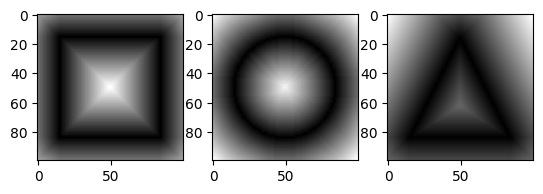

In [15]:
def distance_transform(im):
    return cv.distanceTransform(im, cv.DIST_L2, cv.DIST_MASK_3)

carre_dist = distance_transform(carre)
cercle_dist = distance_transform(cercle)
triangle_dist = distance_transform(triangle)

plot3(carre_dist, cercle_dist, triangle_dist)

# Part 2

Hand drawn forms

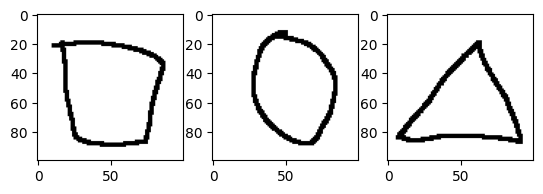

In [17]:
hd_square = load_binary_image("img-tp4/carre-1.png")
hd_circle = load_binary_image("img-tp4/cercle-1.png")
hd_triangle = load_binary_image("img-tp4/triangle-1.png")

plot3(hd_square, hd_circle, hd_triangle)

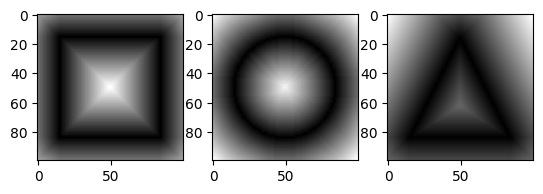

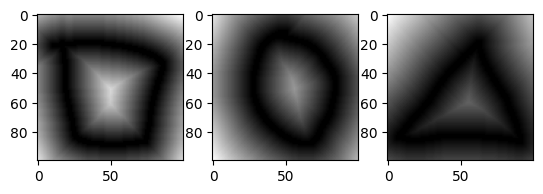

In [18]:
hd_carre_dist = distance_transform(hd_square)
hd_cercle_dist = distance_transform(hd_circle)
hd_triangle_dist = distance_transform(hd_triangle)

plot3(carre_dist, cercle_dist, triangle_dist)

plot3(hd_carre_dist, hd_cercle_dist, hd_triangle_dist)

In [19]:
def find_closest(im):
    calc_error = lambda im1, im2: np.sum(np.abs(im1 - im2))

    errors = [ calc_error(im, oim) for oim in [carre_dist, cercle_dist, triangle_dist] ]
    return errors, np.argmin(errors)

print("square", find_closest(hd_carre_dist))
print("circle", find_closest(hd_cercle_dist))
print("triangle", find_closest(hd_triangle_dist))

square ([44430.03, 38995.01, 93137.69], 1)
circle ([74180.35, 45768.445, 89038.33], 1)
triangle ([92770.06, 90430.47, 47937.64], 2)
